## Airline Data Analysis
Allison Liu  
2024/1/18
### Situation:
Going through bankruptcies, multiple economic recessions, and threats of mergers, the Airlines were now stable and profitable. Its Director embarked on **developing more robust customer insights as a top priority**
### Complication:
The company **did not have a dedicated data analyst on staff** and lack of customer knowledge, which significantly hampers the team’s digital marketing and advertising efforts.
### Key Questions:
1. Paint a picture of different customer segmentations 
2. Which ways offer the Airlines the most insights? And, how could the insights be used?

### Analysis process
1. Load package and data
2. Data cleaning - duplicated values, missing values, outliers
3. Join two datasets
4. Exploratory data analysis
5. RFM model
6. Clustering analysis using kmeans
7. Segmentation result and analysis

### 1. Import package and load data

In [52]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [53]:
data = pd.read_csv('s_customer.csv', usecols=lambda column: column != 'Unnamed: 0')

In [54]:
data

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,M,Young Adults,Not member,No,1,174.0,0,Coach,0.0,SCA Website Booking
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,M,Youth,Not member,No,1,231.9,0,Coach,1.0,Outside Booking
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,F,Middle Aged,Not member,No,1,294.9,0,Coach,0.0,Airport
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,M,Middle Aged,Not member,No,2,0.0,2,Coach,0.0,Tour Operator Portal
4,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,M,Young Adults,Standard,No,2,973.6,0,Coach,2.0,Outside Booking
...,...,...,...,...,...,...,...,...,...,...,...
1537632,5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F5345504837368.0M,M,Senior,Not member,No,1,418.0,0,Coach,0.0,Outside Booking
1537633,5A595749454344696420493F7C2067657420746869732072696768744A414D455337368.0M,M,Senior,Not member,No,2,479.6,0,Coach,0.0,Outside Booking
1537634,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M,M,Young Adults,Not member,No,2,715.6,0,Coach,0.0,SCA Website Booking
1537635,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C44938.0F,F,Young Adults,Standard,No,2,595.2,0,Coach,0.0,Outside Booking


### Basic column values calculation
Through value count to understand distribution of columns

In [55]:
col = ['Gender', 'Age_group', 'Ufly_membership_status', 'Card_holder?', 'Preferred_travel_class', 'Preferred_source-booking']

count_results = {}
for cols in col:
    count_results[cols] = data[cols].value_counts()

In [56]:
for col, counts in count_results.items():
    print(f"Counts for column '{col}':\n{counts}\n")

Counts for column 'Gender':
F    802874
M    734744
U        19
Name: Gender, dtype: int64

Counts for column 'Age_group':
Young Adults    412820
Senior          375638
Middle Aged     353628
Children        201654
Youth           193897
Name: Age_group, dtype: int64

Counts for column 'Ufly_membership_status':
Not member    1267059
Standard       269245
Elite            1333
Name: Ufly_membership_status, dtype: int64

Counts for column 'Card_holder?':
No     1526944
Yes      10693
Name: Card_holder?, dtype: int64

Counts for column 'Preferred_travel_class':
Coach          1491411
First Class      46226
Name: Preferred_travel_class, dtype: int64

Counts for column 'Preferred_source-booking':
Outside Booking         689573
SCA Website Booking     642333
Reservations Booking     71111
Tour Operator Portal     60523
SY Vacation              37151
No Preference            31800
Airport                   5146
Name: Preferred_source-booking, dtype: int64



In [57]:
data.isnull().sum()

CustomerID                  0
Gender                      0
Age_group                   0
Ufly_membership_status      0
Card_holder?                0
Total_trips                 0
Total_amount_spent          0
#Discounts                  0
Preferred_travel_class      0
#Upgrades                   0
Preferred_source-booking    0
dtype: int64

In [58]:
data.drop_duplicates()

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,M,Young Adults,Not member,No,1,174.0,0,Coach,0.0,SCA Website Booking
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,M,Youth,Not member,No,1,231.9,0,Coach,1.0,Outside Booking
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,F,Middle Aged,Not member,No,1,294.9,0,Coach,0.0,Airport
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,M,Middle Aged,Not member,No,2,0.0,2,Coach,0.0,Tour Operator Portal
4,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,M,Young Adults,Standard,No,2,973.6,0,Coach,2.0,Outside Booking
...,...,...,...,...,...,...,...,...,...,...,...
1537632,5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F5345504837368.0M,M,Senior,Not member,No,1,418.0,0,Coach,0.0,Outside Booking
1537633,5A595749454344696420493F7C2067657420746869732072696768744A414D455337368.0M,M,Senior,Not member,No,2,479.6,0,Coach,0.0,Outside Booking
1537634,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M,M,Young Adults,Not member,No,2,715.6,0,Coach,0.0,SCA Website Booking
1537635,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C44938.0F,F,Young Adults,Standard,No,2,595.2,0,Coach,0.0,Outside Booking


In [59]:
unique_count = data['CustomerID'].nunique()
print(unique_count)

1528104


### Check duplicate customers to see their change of age and Ufly membership status
Identify which columns are more than one customerID and see what's their difference

In [60]:
duplicate_customer = data[data.groupby('CustomerID')['CustomerID'].transform('count') > 1]

In [61]:
duplicate_customer

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking
207,41414D4F445444696420493F7C20676574207468697320726967687444414E49454C20525554484552464F524450634.0M,M,Young Adults,Not member,No,2,157.0,0,Coach,0.0,Outside Booking
208,41414D4F445444696420493F7C20676574207468697320726967687444414E49454C20525554484552464F524450634.0M,M,Youth,Not member,No,2,157.0,0,Coach,0.0,Outside Booking
515,4141534544696420493F7C206765742074686973207269676874434F425939863.0M,M,Middle Aged,Standard,Yes,4,1589.6,0,Coach,0.0,No Preference
516,4141534544696420493F7C206765742074686973207269676874434F425939863.0M,M,Senior,Standard,Yes,4,1589.6,0,Coach,0.0,No Preference
537,414153454E44696420493F7C206765742074686973207269676874414242592057494C4C4F5753438.0F,F,Children,Standard,No,3,1020.0,0,Coach,1.0,Outside Booking
...,...,...,...,...,...,...,...,...,...,...,...
1537419,5A5749454E455244696420493F7C2067657420746869732072696768744241524241524139792.0F,F,Senior,Standard,No,4,1020.0,2,Coach,0.0,SCA Website Booking
1537537,5A594C4144696420493F7C2067657420746869732072696768745A41434841525953242.0M,M,Children,Not member,No,4,1613.6,0,Coach,0.0,Outside Booking
1537538,5A594C4144696420493F7C2067657420746869732072696768745A41434841525953242.0M,M,Youth,Not member,No,4,1613.6,0,Coach,0.0,Outside Booking
1537549,5A594C4B4144696420493F7C2067657420746869732072696768744B4154484C45454E39926.0F,F,Middle Aged,Not member,No,6,851.0,6,Coach,0.0,No Preference


In [62]:
def get_second_occurrence(series):
    return series.iloc[1] if len(series) > 1 else series.iloc[0]

duplicate_customer['Age_group_new'] = duplicate_customer.groupby('CustomerID')['Age_group'].transform(get_second_occurrence)
duplicate_customer['Ufly_membership_status_new'] = duplicate_customer.groupby('CustomerID')['Ufly_membership_status'].transform(get_second_occurrence)

C:\Users\User\AppData\Local\Temp\ipykernel_27268\2798066352.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_customer['Age_group_new'] = duplicate_customer.groupby('CustomerID')['Age_group'].transform(get_second_occurrence)
C:\Users\User\AppData\Local\Temp\ipykernel_27268\2798066352.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_customer['Ufly_membership_status_new'] = duplicate_customer.groupby('CustomerID')['Ufly_membership_status'].transform(get_second_occurrence)


In [63]:
duplicate_customer['is_second_occurrence'] = duplicate_customer.duplicated(subset='CustomerID', keep='first')

C:\Users\User\AppData\Local\Temp\ipykernel_27268\3069263053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate_customer['is_second_occurrence'] = duplicate_customer.duplicated(subset='CustomerID', keep='first')


In [64]:
duplicate_customer

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking,Age_group_new,Ufly_membership_status_new,is_second_occurrence
207,41414D4F445444696420493F7C20676574207468697320726967687444414E49454C20525554484552464F524450634.0M,M,Young Adults,Not member,No,2,157.0,0,Coach,0.0,Outside Booking,Youth,Not member,False
208,41414D4F445444696420493F7C20676574207468697320726967687444414E49454C20525554484552464F524450634.0M,M,Youth,Not member,No,2,157.0,0,Coach,0.0,Outside Booking,Youth,Not member,True
515,4141534544696420493F7C206765742074686973207269676874434F425939863.0M,M,Middle Aged,Standard,Yes,4,1589.6,0,Coach,0.0,No Preference,Senior,Standard,False
516,4141534544696420493F7C206765742074686973207269676874434F425939863.0M,M,Senior,Standard,Yes,4,1589.6,0,Coach,0.0,No Preference,Senior,Standard,True
537,414153454E44696420493F7C206765742074686973207269676874414242592057494C4C4F5753438.0F,F,Children,Standard,No,3,1020.0,0,Coach,1.0,Outside Booking,Youth,Standard,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537419,5A5749454E455244696420493F7C2067657420746869732072696768744241524241524139792.0F,F,Senior,Standard,No,4,1020.0,2,Coach,0.0,SCA Website Booking,Senior,Standard,True
1537537,5A594C4144696420493F7C2067657420746869732072696768745A41434841525953242.0M,M,Children,Not member,No,4,1613.6,0,Coach,0.0,Outside Booking,Youth,Not member,False
1537538,5A594C4144696420493F7C2067657420746869732072696768745A41434841525953242.0M,M,Youth,Not member,No,4,1613.6,0,Coach,0.0,Outside Booking,Youth,Not member,True
1537549,5A594C4B4144696420493F7C2067657420746869732072696768744B4154484C45454E39926.0F,F,Middle Aged,Not member,No,6,851.0,6,Coach,0.0,No Preference,Senior,Standard,False


In [65]:
duplicate_customer = duplicate_customer[duplicate_customer['is_second_occurrence'] == False]

In [66]:
duplicate_customer = duplicate_customer.drop('is_second_occurrence', axis=1)

In [67]:
duplicate_customer

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking,Age_group_new,Ufly_membership_status_new
207,41414D4F445444696420493F7C20676574207468697320726967687444414E49454C20525554484552464F524450634.0M,M,Young Adults,Not member,No,2,157.00,0,Coach,0.0,Outside Booking,Youth,Not member
515,4141534544696420493F7C206765742074686973207269676874434F425939863.0M,M,Middle Aged,Standard,Yes,4,1589.60,0,Coach,0.0,No Preference,Senior,Standard
537,414153454E44696420493F7C206765742074686973207269676874414242592057494C4C4F5753438.0F,F,Children,Standard,No,3,1020.00,0,Coach,1.0,Outside Booking,Youth,Standard
585,414153455244696420493F7C206765742074686973207269676874414D494E50479.0M,M,Young Adults,Not member,No,6,716.50,3,Coach,0.0,Outside Booking,Youth,Not member
759,41424154454D4152434F44696420493F7C2067657420746869732072696768744D49434841454C204750551.0M,M,Young Adults,Not member,No,4,764.40,4,Coach,0.0,No Preference,Youth,Not member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1537226,5A574549474241554D44696420493F7C2067657420746869732072696768744D49434841454C44938.0M,M,Middle Aged,Not member,No,4,5174.42,4,First Class,0.0,SCA Website Booking,Young Adults,Not member
1537324,5A5749434B5944696420493F7C20676574207468697320726967687453544556454E39547.0M,M,Middle Aged,Not member,No,2,415.80,0,Coach,0.0,Outside Booking,Senior,Not member
1537418,5A5749454E455244696420493F7C2067657420746869732072696768744241524241524139792.0F,F,Middle Aged,Not member,No,4,1020.00,2,Coach,0.0,SCA Website Booking,Senior,Standard
1537537,5A594C4144696420493F7C2067657420746869732072696768745A41434841525953242.0M,M,Children,Not member,No,4,1613.60,0,Coach,0.0,Outside Booking,Youth,Not member


In [68]:
duplicate_customer.groupby(['Ufly_membership_status', 'Ufly_membership_status_new']).size().reset_index(name='counts')

,Ufly_membership_status,Ufly_membership_status_new,counts
0,Elite,Elite,40
1,Elite,Not member,2
2,Elite,Standard,2
3,Not member,Elite,3
4,Not member,Not member,5670
5,Not member,Standard,644
6,Standard,Elite,1
7,Standard,Not member,674
8,Standard,Standard,2497


### Membership change from non-member to standard
Point out duplicated customer who changed from not member to standard membership and understand the characteristic of these customers

In [69]:
standard_member = duplicate_customer[(duplicate_customer['Ufly_membership_status'] == 'Not member') 
                                     & (duplicate_customer['Ufly_membership_status_new'] == 'Standard')]
standard_member

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking,Age_group_new,Ufly_membership_status_new
4360,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E44524153284.0F,F,Children,Not member,No,4,985.60,2,Coach,1.0,SCA Website Booking,Youth,Standard
8553,41444B494E5344696420493F7C2067657420746869732072696768745041545249434B204A414D455353170.0M,M,Children,Not member,No,6,1709.48,2,Coach,0.0,SCA Website Booking,Youth,Standard
9411,4147415257414C44696420493F7C206765742074686973207269676874414248495348454B50480.0M,M,Young Adults,Not member,No,2,298.00,2,Coach,0.0,SCA Website Booking,Youth,Standard
15423,414C424F44696420493F7C206765742074686973207269676874524F4245525439499.0M,M,Middle Aged,Not member,No,5,2343.90,2,Coach,0.0,SCA Website Booking,Senior,Standard
15798,414C42524947485444696420493F7C2067657420746869732072696768744449414E4539577.0F,F,Middle Aged,Not member,No,3,645.80,0,Coach,0.0,Outside Booking,Senior,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526678,5A454A444C494B44696420493F7C2067657420746869732072696768744A4F454C204D49434841454C39656.0M,M,Middle Aged,Not member,No,2,673.99,0,Coach,0.0,SCA Website Booking,Senior,Standard
1529373,5A48414E4744696420493F7C20676574207468697320726967687457454951494E4739944.0M,M,Middle Aged,Not member,Yes,3,816.10,2,Coach,0.0,SCA Website Booking,Senior,Standard
1531017,5A484F5544696420493F7C2067657420746869732072696768744C5550591.0F,F,Young Adults,Not member,No,2,317.00,0,Coach,0.0,Outside Booking,Youth,Standard
1537418,5A5749454E455244696420493F7C2067657420746869732072696768744241524241524139792.0F,F,Middle Aged,Not member,No,4,1020.00,2,Coach,0.0,SCA Website Booking,Senior,Standard


In [70]:
standard_member.describe()

,Total_trips,Total_amount_spent,#Discounts,#Upgrades
count,644.000000,644.00000,644.000000,644.000000
mean,4.745342,1656.05854,1.677019,0.445652
std,2.190122,1420.24431,1.929077,1.167935
min,2.000000,0.00000,0.000000,-1.000000
25%,4.000000,894.65000,0.000000,0.000000
50%,4.000000,1404.19000,2.000000,0.000000
75%,6.000000,2098.05000,2.000000,0.000000
max,25.000000,24478.30000,23.000000,9.000000


In [71]:
standard_member['Total_trips'].value_counts()

4     263
3     124
6      91
5      51
2      29
8      29
7      22
10     13
9      12
12      3
14      2
17      1
11      1
19      1
25      1
13      1
Name: Total_trips, dtype: int64

In [72]:
standard_member['Total_trips'].mean()

4.745341614906832

In [73]:
standard_member['Total_amount_spent'].mean()

1656.0585403726711

In [74]:
standard_member['#Upgrades'].mean()

0.44565217391304346

In [75]:
data.head()

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,M,Young Adults,Not member,No,1,174.0,0,Coach,0.0,SCA Website Booking
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,M,Youth,Not member,No,1,231.9,0,Coach,1.0,Outside Booking
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,F,Middle Aged,Not member,No,1,294.9,0,Coach,0.0,Airport
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,M,Middle Aged,Not member,No,2,0.0,2,Coach,0.0,Tour Operator Portal
4,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,M,Young Adults,Standard,No,2,973.6,0,Coach,2.0,Outside Booking


In [76]:
duplicate_customer_new = data.copy()
duplicate_customer_new['is_duplicated'] = duplicate_customer_new.duplicated(subset='CustomerID', keep='first')
filtered_duplicate_customer = duplicate_customer_new.drop_duplicates(subset='CustomerID', keep='first')
filtered_duplicate_customer = filtered_duplicate_customer.drop(columns='is_duplicated')

In [77]:
filtered_duplicate_customer.shape

(1528104, 11)

In [78]:
filtered_duplicate_customer

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,M,Young Adults,Not member,No,1,174.0,0,Coach,0.0,SCA Website Booking
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,M,Youth,Not member,No,1,231.9,0,Coach,1.0,Outside Booking
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,F,Middle Aged,Not member,No,1,294.9,0,Coach,0.0,Airport
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,M,Middle Aged,Not member,No,2,0.0,2,Coach,0.0,Tour Operator Portal
4,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,M,Young Adults,Standard,No,2,973.6,0,Coach,2.0,Outside Booking
...,...,...,...,...,...,...,...,...,...,...,...
1537632,5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F5345504837368.0M,M,Senior,Not member,No,1,418.0,0,Coach,0.0,Outside Booking
1537633,5A595749454344696420493F7C2067657420746869732072696768744A414D455337368.0M,M,Senior,Not member,No,2,479.6,0,Coach,0.0,Outside Booking
1537634,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M,M,Young Adults,Not member,No,2,715.6,0,Coach,0.0,SCA Website Booking
1537635,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C44938.0F,F,Young Adults,Standard,No,2,595.2,0,Coach,0.0,Outside Booking


In [79]:
data_new = filtered_duplicate_customer.copy()

### Load the second dataset and change EncryptedName to make the same as CustomerID in the first dataset
According to observation, I found that CustomerID = EncryptedName + birthdateid + 0 + GenderCode, so I change EncryptedName to be the same as CustomerID in order to merge two datasets.

In [80]:
booking = pd.read_csv('s_booking.csv', low_memory=False)

In [81]:
booking

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C20676574207468697320726967687453414E445241204C4545,F,35331.0,66.0,NaN,Coach,Coach,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,244,SY,O
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C20676574207468697320726967687453414E445241204C4545,F,35331.0,66.0,NaN,Coach,First Class,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,243,SY,NaN
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C2067657420746869732072696768745259414E204C,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaN,397,SY,O
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C2067657420746869732072696768745259414E204C,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaN,392,SY,NaN
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C2067657420746869732072696768744D4152534841,F,34377.0,69.0,NaN,Coach,Coach,Reservations Booking,112.56,132.0,NaN,NaN,NaN,NaN,NaN,342,SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435383,ZZZDRU,3372107838142,1,MSP,SEA,2014-08-23,2014-12-17,VAN WA,56414E2042494E5342455247454E44696420493F7C20676574207468697320726967687457415252454E204A,M,30152.0,82.0,56265,Coach,Coach,SCA Website Booking,239.07,285.2,190110782.0,Standard,False,SSWMI,2007-12-18 10:52:08.0000000,283,SY,NaN
3435384,ZZZDTU,3372106802007,2,SFO,MSP,2013-05-04,2013-07-14,STONDO,53544F4E4544696420493F7C206765742074686973207269676874444F55474C415320414C4C414E,M,35930.0,64.0,55116,Coach,Coach,SCA Website Booking,351.62,399.8,200548202.0,Standard,False,NaN,2007-08-09 16:46:13.0000000,396,SY,O
3435385,ZZZDTU,3372106802007,1,MSP,SFO,2013-05-04,2013-07-10,STONDO,53544F4E4544696420493F7C206765742074686973207269676874444F55474C415320414C4C414E,M,35930.0,64.0,55116,Coach,Coach,SCA Website Booking,351.62,399.8,200548202.0,Standard,False,NaN,2007-08-09 16:46:13.0000000,391,SY,NaN
3435386,ZZZNBD,3372106947027,1,MSP,SFO,2013-07-21,2013-08-22,CHORE,43484F44696420493F7C20676574207468697320726967687452454941,F,52857.0,18.0,55449,Coach,Coach,SCA Website Booking,146.98,168.9,210391031.0,Standard,False,NaN,2013-07-21 19:46:41.0000000,395,SY,NaN


In [82]:
booking = booking[booking['birthdateid'].notna() & booking['GenderCode'].notna()]

In [83]:
booking

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C20676574207468697320726967687453414E445241204C4545,F,35331.0,66.0,NaN,Coach,Coach,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,244,SY,O
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C20676574207468697320726967687453414E445241204C4545,F,35331.0,66.0,NaN,Coach,First Class,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,243,SY,NaN
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C2067657420746869732072696768745259414E204C,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaN,397,SY,O
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C2067657420746869732072696768745259414E204C,M,46161.0,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaN,392,SY,NaN
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C2067657420746869732072696768744D4152534841,F,34377.0,69.0,NaN,Coach,Coach,Reservations Booking,112.56,132.0,NaN,NaN,NaN,NaN,NaN,342,SY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435383,ZZZDRU,3372107838142,1,MSP,SEA,2014-08-23,2014-12-17,VAN WA,56414E2042494E5342455247454E44696420493F7C20676574207468697320726967687457415252454E204A,M,30152.0,82.0,56265,Coach,Coach,SCA Website Booking,239.07,285.2,190110782.0,Standard,False,SSWMI,2007-12-18 10:52:08.0000000,283,SY,NaN
3435384,ZZZDTU,3372106802007,2,SFO,MSP,2013-05-04,2013-07-14,STONDO,53544F4E4544696420493F7C206765742074686973207269676874444F55474C415320414C4C414E,M,35930.0,64.0,55116,Coach,Coach,SCA Website Booking,351.62,399.8,200548202.0,Standard,False,NaN,2007-08-09 16:46:13.0000000,396,SY,O
3435385,ZZZDTU,3372106802007,1,MSP,SFO,2013-05-04,2013-07-10,STONDO,53544F4E4544696420493F7C206765742074686973207269676874444F55474C415320414C4C414E,M,35930.0,64.0,55116,Coach,Coach,SCA Website Booking,351.62,399.8,200548202.0,Standard,False,NaN,2007-08-09 16:46:13.0000000,391,SY,NaN
3435386,ZZZNBD,3372106947027,1,MSP,SFO,2013-07-21,2013-08-22,CHORE,43484F44696420493F7C20676574207468697320726967687452454941,F,52857.0,18.0,55449,Coach,Coach,SCA Website Booking,146.98,168.9,210391031.0,Standard,False,NaN,2013-07-21 19:46:41.0000000,395,SY,NaN


In [84]:
booking['birthdateid'] = booking['birthdateid'].astype(int).astype(str)

C:\Users\User\AppData\Local\Temp\ipykernel_27268\3066412986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking['birthdateid'] = booking['birthdateid'].astype(int).astype(str)


In [85]:
booking['NameID'] = booking['EncryptedName'] + booking['birthdateid'] + '.' + '0' + booking['GenderCode']

C:\Users\User\AppData\Local\Temp\ipykernel_27268\2358960747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  booking['NameID'] = booking['EncryptedName'] + booking['birthdateid'] + '.' + '0' + booking['GenderCode']


In [86]:
booking

,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,NameID
0,AAABJK,3377365159634,2,JFK,MSP,2013-11-23,2013-12-13,BRUMSA,4252554D4241434B44696420493F7C20676574207468697320726967687453414E445241204C4545,F,35331,66.0,NaN,Coach,Coach,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,244,SY,O,4252554D4241434B44696420493F7C20676574207468697320726967687453414E445241204C454535331.0F
1,AAABJK,3377365159634,1,MSP,JFK,2013-11-23,2013-12-08,BRUMSA,4252554D4241434B44696420493F7C20676574207468697320726967687453414E445241204C4545,F,35331,66.0,NaN,Coach,First Class,Outside Booking,234.20,0.0,NaN,NaN,NaN,CHEOPQ,NaN,243,SY,NaN,4252554D4241434B44696420493F7C20676574207468697320726967687453414E445241204C454535331.0F
2,AAABMK,3372107381942,2,MSP,SFO,2014-02-04,2014-02-23,EILDRY,45494C4445525344696420493F7C2067657420746869732072696768745259414E204C,M,46161,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaN,397,SY,O,45494C4445525344696420493F7C2067657420746869732072696768745259414E204C46161.0M
3,AAABMK,3372107381942,1,SFO,MSP,2014-02-04,2014-02-20,EILDRY,45494C4445525344696420493F7C2067657420746869732072696768745259414E204C,M,46161,37.0,NaN,Coach,Discount First Class,SCA Website Booking,293.96,338.0,NaN,NaN,NaN,NaN,NaN,392,SY,NaN,45494C4445525344696420493F7C2067657420746869732072696768745259414E204C46161.0M
4,AAABTP,3372107470782,1,MCO,MSP,2014-03-13,2014-04-23,SKELMA,534B454C544F4E44696420493F7C2067657420746869732072696768744D4152534841,F,34377,69.0,NaN,Coach,Coach,Reservations Booking,112.56,132.0,NaN,NaN,NaN,NaN,NaN,342,SY,NaN,534B454C544F4E44696420493F7C2067657420746869732072696768744D415253484134377.0F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3435383,ZZZDRU,3372107838142,1,MSP,SEA,2014-08-23,2014-12-17,VAN WA,56414E2042494E5342455247454E44696420493F7C20676574207468697320726967687457415252454E204A,M,30152,82.0,56265,Coach,Coach,SCA Website Booking,239.07,285.2,190110782.0,Standard,False,SSWMI,2007-12-18 10:52:08.0000000,283,SY,NaN,56414E2042494E5342455247454E44696420493F7C20676574207468697320726967687457415252454E204A30152.0M
3435384,ZZZDTU,3372106802007,2,SFO,MSP,2013-05-04,2013-07-14,STONDO,53544F4E4544696420493F7C206765742074686973207269676874444F55474C415320414C4C414E,M,35930,64.0,55116,Coach,Coach,SCA Website Booking,351.62,399.8,200548202.0,Standard,False,NaN,2007-08-09 16:46:13.0000000,396,SY,O,53544F4E4544696420493F7C206765742074686973207269676874444F55474C415320414C4C414E35930.0M
3435385,ZZZDTU,3372106802007,1,MSP,SFO,2013-05-04,2013-07-10,STONDO,53544F4E4544696420493F7C206765742074686973207269676874444F55474C415320414C4C414E,M,35930,64.0,55116,Coach,Coach,SCA Website Booking,351.62,399.8,200548202.0,Standard,False,NaN,2007-08-09 16:46:13.0000000,391,SY,NaN,53544F4E4544696420493F7C206765742074686973207269676874444F55474C415320414C4C414E35930.0M
3435386,ZZZNBD,3372106947027,1,MSP,SFO,2013-07-21,2013-08-22,CHORE,43484F44696420493F7C20676574207468697320726967687452454941,F,52857,18.0,55449,Coach,Coach,SCA Website Booking,146.98,168.9,210391031.0,Standard,False,NaN,2013-07-21 19:46:41.0000000,395,SY,NaN,43484F44696420493F7C2067657420746869732072696768745245494152857.0F


In [87]:
col = ['GenderCode', 'BkdClassOfService', 'TrvldClassOfService', 'BookingChannel', 'UflyMemberStatus', 'CardHolder'
      , 'MarketingAirlineCode', 'StopoverCode']

count_results = {}
for cols in col:
    count_results[cols] = booking[cols].value_counts()
    
for col, counts in count_results.items():
    print(f"Counts for column '{col}':\n{counts}\n")

Counts for column 'GenderCode':
F    1770581
M    1620768
U         40
Name: GenderCode, dtype: int64

Counts for column 'BkdClassOfService':
Coach                   3297770
First Class               92462
Discount First Class       1157
Name: BkdClassOfService, dtype: int64

Counts for column 'TrvldClassOfService':
Coach                   3135424
First Class              167357
Discount First Class      88608
Name: TrvldClassOfService, dtype: int64

Counts for column 'BookingChannel':
Outside Booking         1472233
SCA Website Booking     1454470
Reservations Booking     226323
Tour Operator Portal     132889
SY Vacation               93609
MSP                        4942
FCM                        3798
DFW                         521
XTM                         476
LAX                         414
LAN                         269
MKE                         262
JFK                         256
MDW                         204
LAS                         179
UFO                         1

In [88]:
booking.isnull().sum()

PNRLocatorID                  0
TicketNum                     0
CouponSeqNbr                  0
ServiceStartCity              0
ServiceEndCity                0
PNRCreateDate                 0
ServiceStartDate              0
PaxName                       0
EncryptedName                 0
GenderCode                    0
birthdateid                   0
Age                           0
PostalCode              2703822
BkdClassOfService             0
TrvldClassOfService           0
BookingChannel                0
BaseFareAmt                   0
TotalDocAmt                   0
UFlyRewardsNumber       2699758
UflyMemberStatus        2699758
CardHolder              2699758
BookedProduct           2203433
EnrollDate              2699758
MarketingFlightNbr            0
MarketingAirlineCode          0
StopoverCode            1697229
NameID                        0
dtype: int64

In [89]:
df = pd.merge(data_new, booking, left_on='CustomerID', right_on='NameID', how="inner")

In [90]:
df

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,NameID
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,M,Young Adults,Not member,No,1,174.0,0,Coach,0.0,SCA Website Booking,ILHGNM,3372107578918,1,MSP,SAN,2014-05-06,2014-05-13,A ALZI,4120414C52484D414E44696420493F7C2067657420746869732072696768745A494144,M,47687,33.0,NaN,Coach,Coach,SCA Website Booking,151.63,174.0,NaN,NaN,NaN,NaN,NaN,401,SY,NaN,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,M,Youth,Not member,No,1,231.9,0,Coach,1.0,Outside Booking,EFTYGS,3377222187405,1,JFK,MSP,2013-04-18,2013-06-07,AABEKE,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E,M,50666,24.0,NaN,Coach,Discount First Class,Outside Booking,205.58,231.9,NaN,NaN,NaN,NaN,NaN,244,SY,NaN,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,F,Middle Aged,Not member,No,1,294.9,0,Coach,0.0,Airport,NUREZA,3372106653555,1,LAS,MSP,2013-02-08,2013-02-08,AABENA,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E4359,F,39435,54.0,NaN,Coach,Coach,LAS,264.19,294.9,NaN,NaN,NaN,NaN,NaN,108,SY,NaN,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,M,Middle Aged,Not member,No,2,0.0,2,Coach,0.0,Tour Operator Portal,UKBSJV,3372107450630,1,MSP,CZM,2014-03-05,2014-03-14,AABEAL,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F50484552,M,40549,52.0,NaN,Coach,Coach,Tour Operator Portal,0.00,0.0,NaN,NaN,NaN,BSGTIX,NaN,527,SY,NaN,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M
4,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,M,Middle Aged,Not member,No,2,0.0,2,Coach,0.0,Tour Operator Portal,UKBSJV,3372107450630,2,CZM,MSP,2014-03-05,2014-03-21,AABEAL,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F50484552,M,40549,52.0,NaN,Coach,Coach,Tour Operator Portal,0.00,0.0,NaN,NaN,NaN,BSGTIX,NaN,528,SY,O,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3391261,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M,M,Young Adults,Not member,No,2,715.6,0,Coach,0.0,SCA Website Booking,DMRDUY,3372106816326,2,BOS,MSP,2013-05-14,2013-07-16,ZYWIJO,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D4553,M,47616,32.0,NaN,Coach,Coach,SCA Website Booking,312.56,357.8,NaN,NaN,NaN,NaN,NaN,252,SY,O,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M
3391262,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C44938.0F,F,Young Adults,Standard,No,2,595.2,0,Coach,0.0,Outside Booking,ZGXJCZ,3377148606540,1,MSP,RSW,2012-11-21,2013-04-12,ZYWOAM,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C,F,44938,39.0,55372,Coach,Coach,Outside Booking,256.74,297.6,210222644.0,Standard,False,NaN,2013-04-11 09:58:42.0000000,381,SY,NaN,5A59574F544B4F44696420493F7C2067

### Calculate round trips for each customers
I'm curious about how many round trips for each customers and its descriptive statistics

In [91]:
df['Next_StartCity'] = df.groupby(['CustomerID', 'TicketNum'])['ServiceEndCity'].shift(1)

In [92]:
df.head(20)

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,NameID,Next_StartCity
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,M,Young Adults,Not member,No,1,174.0,0,Coach,0.0,SCA Website Booking,ILHGNM,3372107578918,1,MSP,SAN,2014-05-06,2014-05-13,A ALZI,4120414C52484D414E44696420493F7C2067657420746869732072696768745A494144,M,47687,33.0,NaN,Coach,Coach,SCA Website Booking,151.63,174.0,NaN,NaN,NaN,NaN,NaN,401,SY,NaN,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,NaN
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,M,Youth,Not member,No,1,231.9,0,Coach,1.0,Outside Booking,EFTYGS,3377222187405,1,JFK,MSP,2013-04-18,2013-06-07,AABEKE,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E,M,50666,24.0,NaN,Coach,Discount First Class,Outside Booking,205.58,231.9,NaN,NaN,NaN,NaN,NaN,244,SY,NaN,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,NaN
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,F,Middle Aged,Not member,No,1,294.9,0,Coach,0.0,Airport,NUREZA,3372106653555,1,LAS,MSP,2013-02-08,2013-02-08,AABENA,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E4359,F,39435,54.0,NaN,Coach,Coach,LAS,264.19,294.9,NaN,NaN,NaN,NaN,NaN,108,SY,NaN,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,NaN
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,M,Middle Aged,Not member,No,2,0.0,2,Coach,0.0,Tour Operator Portal,UKBSJV,3372107450630,1,MSP,CZM,2014-03-05,2014-03-14,AABEAL,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F50484552,M,40549,52.0,NaN,Coach,Coach,Tour Operator Portal,0.00,0.0,NaN,NaN,NaN,BSGTIX,NaN,527,SY,NaN,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,NaN
4,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,M,Middle Aged,Not member,No,2,0.0,2,Coach,0.0,Tour Operator Portal,UKBSJV,3372107450630,2,CZM,MSP,2014-03-05,2014-03-21,AABEAL,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F50484552,M,40549,52.0,NaN,Coach,Coach,Tour Operator Portal,0.00,0.0,NaN,NaN,NaN,BSGTIX,NaN,528,SY,O,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,CZM
5,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,M,Young Adults,Standard,No,2,973.6,0,Coach,2.0,Outside Booking,OLFKLZ,3377276272480,1,LAX,MSP,2013-07-02,2013-07-11,AABEAN,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E,M,48964,29.0,92084,Coach,Discount First Class,Outside Booking,432.56,486.8,210373586.0,Standard,False,NaN,2013-07-10 22:35:31.0000000,426,SY,O,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,NaN
6,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,M,Young Adults,Standard,No,2,973.6,0,Coach,2.0,Outside Booking,OLFKLZ,3377276272480,2,MSP,LAX,2013-07-02,2013-07-13,AABEAN,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E,M,48964,29.0,92084,Coach,First Class,Outside Booking,432.56,486.8,210373586.0,Standard,False,NaN,2013-07-10 22:35:31.0000000,425,SY,O,41414245524744696420493F7C2067657420746869732072696768744

In [93]:
round_trip_tickets = df[df['ServiceStartCity'] == df['Next_StartCity']]
round_trip_counts = round_trip_tickets.groupby('CustomerID').size().reset_index(name='RoundTripCount')

In [94]:
round_trip_counts

,CustomerID,RoundTripCount
0,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,1
1,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,1
2,41414245524744696420493F7C206765742074686973207269676874434F4C4C45454E204D44420.0F,1
3,41414245524744696420493F7C206765742074686973207269676874434F4C4C45454E44420.0F,1
4,41414245524744696420493F7C2067657420746869732072696768744A414D4F4E44408.0M,1
...,...,...
1124540,5A595749435A44696420493F7C2067657420746869732072696768744D4552494E444152830.0F,1
1124541,5A595749454344696420493F7C2067657420746869732072696768744A414D455337368.0M,1
1124542,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M,1
1124543,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C44938.0F,1


In [95]:
round_trip_counts.describe()

,RoundTripCount
count,1.124545e+06
mean,1.254095e+00
std,7.931745e-01
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,1.000000e+00
max,5.000000e+01


In [96]:
round_trip_counts['RoundTripCount'].value_counts()

1     960891
2      90940
3      50999
5       8772
4       7999
6       1768
7       1537
8        498
9        358
10       261
11       144
12       117
14        54
13        53
16        27
15        24
17        21
18        15
19        13
22         8
20         7
26         6
21         6
23         6
27         5
25         4
28         2
24         2
30         2
35         1
42         1
50         1
43         1
29         1
46         1
Name: RoundTripCount, dtype: int64

In [97]:
round_trip_counts['RoundTripCount'].mean()

1.2540947672169633

In [98]:
df = df[df['MarketingAirlineCode'] == 'SY']

In [99]:
df.shape

(3386375, 39)

In [100]:
df.isnull().sum()

CustomerID                        0
Gender                            0
Age_group                         0
Ufly_membership_status            0
Card_holder?                      0
Total_trips                       0
Total_amount_spent                0
#Discounts                        0
Preferred_travel_class            0
#Upgrades                         0
Preferred_source-booking          0
PNRLocatorID                      0
TicketNum                         0
CouponSeqNbr                      0
ServiceStartCity                  0
ServiceEndCity                    0
PNRCreateDate                     0
ServiceStartDate                  0
PaxName                           0
EncryptedName                     0
GenderCode                        0
birthdateid                       0
Age                               0
PostalCode                  2698814
BkdClassOfService                 0
TrvldClassOfService               0
BookingChannel                    0
BaseFareAmt                 

### Outliers of age
I used describe() to find out which columns have outliers

In [101]:
df.describe()

,Total_trips,Total_amount_spent,#Discounts,#Upgrades,TicketNum,CouponSeqNbr,Age,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber
count,3.386375e+06,3.386375e+06,3.386375e+06,3.386375e+06,3.386375e+06,3.386375e+06,3.386375e+06,3.386375e+06,3.386375e+06,6.916250e+05
mean,2.988569e+00,9.670090e+02,1.076654e+00,2.300055e-01,3.374324e+12,1.461386e+00,4.005305e+01,2.864821e+02,3.134898e+02,2.042452e+08
std,3.576929e+00,1.373143e+03,2.365698e+00,1.522130e+00,2.578989e+09,5.729685e-01,1.935302e+01,1.813641e+02,2.118349e+02,1.484073e+07
min,1.000000e+00,0.000000e+00,0.000000e+00,-6.000000e+00,3.372052e+12,1.000000e+00,-2.883000e+03,0.000000e+00,0.000000e+00,1.000002e+08
25%,2.000000e+00,3.942000e+02,0.000000e+00,0.000000e+00,3.372107e+12,1.000000e+00,2.600000e+01,1.730200e+02,1.889000e+02,2.008625e+08
50%,2.000000e+00,6.876000e+02,0.000000e+00,0.000000e+00,3.372108e+12,1.000000e+00,4.000000e+01,2.706900e+02,3.002000e+02,2.029687e+08
75%,3.000000e+00,1.151400e+03,2.000000e+00,0.000000e+00,3.377296e+12,2.000000e+00,5.500000e+01,3.683800e+02,4.128700e+02,2.103834e+08
max,1.040000e+02,4.655678e+04,1.030000e+02,7.000000e+01,3.379578e+12,8.000000e+00,2.012000e+03,4.342000e+03,1.757200e+04,2.410863e+08


In [173]:
df = df[(df['Age'] <= 120) & df['Age'] > 0]

In [175]:
df.shape

(3375239, 40)

In [179]:
df['Age'].mean()

40.1765866061633

### Exploratory Data Analysis
I would like to explore what's each columns look like, such as demography, membership status, card holder, total trips or booking channel, etc to further understand the data. 

In [180]:
unique_count_new = df['CustomerID'].nunique()
print(unique_count_new)

1522334


In [182]:
unique_df = df.drop_duplicates(subset='CustomerID')
gender_counts = unique_df['Gender'].value_counts().reset_index(name='Count')
gender_counts

,index,Count
0,F,794944
1,M,727371
2,U,19


In [183]:
agegroup_counts = unique_df['Age_group'].value_counts().reset_index(name='Count')
agegroup_counts

,index,Count
0,Young Adults,410446
1,Senior,372476
2,Middle Aged,353628
3,Children,195901
4,Youth,189883


In [184]:
membership_counts = unique_df['Ufly_membership_status'].value_counts().reset_index(name='Count')
membership_counts

,index,Count
0,Not member,1256075
1,Standard,264975
2,Elite,1284


In [185]:
cardholder_counts = unique_df['Card_holder?'].value_counts().reset_index(name='Count')
cardholder_counts

,index,Count
0,No,1511893
1,Yes,10441


In [186]:
totaltrips_counts = unique_df['Total_trips'].value_counts().reset_index(name='Count')
totaltrips_counts

,index,Count
0,2,1013339
1,1,308535
2,4,111980
3,3,42980
4,6,17145
...,...,...
72,90,1
73,97,1
74,60,1
75,75,1


In [187]:
df['Total_trips'].max()

104

In [188]:
pre_booking_counts = unique_df['Preferred_source-booking'].value_counts().reset_index(name='Count')
pre_booking_counts

,index,Count
0,Outside Booking,684451
1,SCA Website Booking,634567
2,Reservations Booking,70443
3,Tour Operator Portal,60327
4,SY Vacation,36986
5,No Preference,30456
6,Airport,5104


In [189]:
booking_channel_counts = unique_df['BookingChannel'].value_counts().reset_index(name='Count')
booking_channel_counts

,index,Count
0,Outside Booking,695197
1,SCA Website Booking,646174
2,Reservations Booking,74690
3,Tour Operator Portal,61711
4,SY Vacation,38918
5,MSP,2450
6,FCM,1335
7,DFW,328
8,LAX,261
9,XTM,229


In [190]:
df.groupby(['ServiceStartCity', 'ServiceEndCity']).size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(30)

,ServiceStartCity,ServiceEndCity,Count
60,LAS,MSP,170966
86,MSP,LAS,170348
51,JFK,MSP,137728
84,MSP,JFK,135334
61,LAX,MSP,129434
87,MSP,LAX,129377
129,SFO,MSP,129094
90,MSP,MCO,128774
103,MSP,SFO,127580
69,MCO,MSP,127049


In [191]:
routes_num = df.groupby(['ServiceStartCity', 'ServiceEndCity']).size().reset_index(name='Count')
routes_num.shape

(138, 3)

In [192]:
service_city = df.groupby(['ServiceStartCity', 'ServiceEndCity']).size().reset_index(name='Count').sort_values(by='Count', ascending=False)
service_city.shape

(138, 3)

In [193]:
service_city[service_city['ServiceStartCity'] == 'MSP'].shape

(37, 3)

In [194]:
service_city[service_city['ServiceEndCity'] == 'MSP'].shape

(36, 3)

In [195]:
df.groupby(['BkdClassOfService', 'TrvldClassOfService']).size().reset_index(name='Count')

,BkdClassOfService,TrvldClassOfService,Count
0,Coach,Coach,3116550
1,Coach,Discount First Class,87556
2,Coach,First Class,78206
3,Discount First Class,Coach,44
4,Discount First Class,Discount First Class,763
5,Discount First Class,First Class,1
6,First Class,Coach,3480
7,First Class,Discount First Class,28
8,First Class,First Class,88611


In [196]:
df['PNRCreateDate'].min()

'2011-06-22'

In [197]:
df['PNRCreateDate'].max()

'2015-01-01'

In [198]:
df['ServiceStartDate'].min()

'2013-01-01'

In [199]:
df['ServiceStartDate'].max()

'2014-12-31'

In [200]:
df[df['CouponSeqNbr'] > 5]

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,NameID,Next_StartCity,Monetary
51421,414C544F42454C4C4944696420493F7C20676574207468697320726967687443484941524150552.0F,F,Youth,Not member,No,6,0.00,6,Coach,0.0,Outside Booking,NBDESX,3377307027875,6,MSP,PHX,2013-09-17,2013-10-07,ALTOCH,414C544F42454C4C4944696420493F7C206765742074686973207269676874434849415241,F,50552,25.0,NaN,Coach,Coach,Outside Booking,476.20,0.00,NaN,NaN,NaN,ONEOPQ,NaN,607,SY,O,414C544F42454C4C4944696420493F7C20676574207468697320726967687443484941524150552.0F,DCA,0.000000
71027,414E444552534F4E44696420493F7C2067657420746869732072696768744A414D494553487.0F,F,Children,Not member,No,5,1877.00,0,Coach,0.0,SCA Website Booking,JNIKDE,3372106997117,6,MSP,DCA,2013-07-30,2013-09-01,ANDEJA,414E444552534F4E44696420493F7C2067657420746869732072696768744A414D4945,F,53487,16.0,NaN,Coach,Coach,SCA Website Booking,301.39,375.40,NaN,NaN,NaN,NaN,NaN,267,SY,X,414E444552534F4E44696420493F7C2067657420746869732072696768744A414D494553487.0F,MSP,375.400000
95887,4150504C454B414D5044696420493F7C2067657420746869732072696768744D49434841454C37593.0M,M,Senior,Not member,No,2,1635.20,0,Coach,0.0,Outside Booking,NRWMCW,3377176936080,6,LAX,MSP,2013-03-09,2013-04-26,APPLMI,4150504C454B414D5044696420493F7C2067657420746869732072696768744D49434841454C,M,37593,60.0,NaN,Coach,Coach,Outside Booking,727.52,817.60,NaN,NaN,NaN,NaN,NaN,422,SY,O,4150504C454B414D5044696420493F7C2067657420746869732072696768744D49434841454C37593.0M,HNL,817.600000
95893,4150504C454B414D5044696420493F7C206765742074686973207269676874544F4E4938379.0F,F,Senior,Not member,No,2,1635.20,0,Coach,0.0,Outside Booking,NRWMCW,3377176936082,6,LAX,MSP,2013-03-09,2013-04-26,APPLTO,4150504C454B414D5044696420493F7C206765742074686973207269676874544F4E49,F,38379,57.0,NaN,Coach,Coach,Outside Booking,727.52,817.60,NaN,NaN,NaN,NaN,NaN,422,SY,O,4150504C454B414D5044696420493F7C206765742074686973207269676874544F4E4938379.0F,HNL,817.600000
140962,42414B455244696420493F7C2067657420746869732072696768744A414D45534C45524F5936238.0M,M,Senior,Not member,No,7,4557.40,1,Coach,0.0,Outside Booking,DCDRMG,3377313319785,6,MSP,SFO,2013-10-15,2013-12-26,BAKEJA,42414B455244696420493F7C2067657420746869732072696768744A414D45534C45524F59,M,36238,64.0,NaN,Coach,Coach,Outside Booking,657.67,758.40,NaN,NaN,NaN,NaN,NaN,395,SY,O,42414B455244696420493F7C2067657420746869732072696768744A414D45534C45524F5936238.0M,NaN,651.057143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3281408,57494C534F4E44696420493F7C2067657420746869732072696768744E4943484F4C415350117.0M,M,Young Adults,Not member,No,2,1750.42,0,Coach,0.0,Outside Booking,TALFLC,3377528053810,6,SFO,MSP,2014-11-02,2014-12-20,WILSNI,57494C534F4E44696420493F7C2067657420746869732072696768744E4943484F4C4153,M,50117,27.0,NaN,Coach,Coach,Outside Booking,778.88,875.21,NaN,NaN,NaN,NaN,NaN,398,SY,O,57494C534F4E44696420493F7C2067657420746869732072696768744E4943484F4C415350117.0M,HNL,875.210000
3349039,594F554D414E5344696420493F7C206765742074686973207269676874475245474F525939411.0M,M,Senior,Not member,No,2,3260.32,0,Coach,0.0,Outside Booking,FIROAY,3377406146246,7,LAS,MSP,2014-05-09,2014-07-06,YOUMGR,594F554D414E5344696420493F7C206765742074686973207269676874475245474F5259,M,39411,56.0,NaN,Coach,Coach,Outside Booking,1500.78,1630.16,NaN,NaN,NaN,NaN,NaN,0102,SY,O,594F554D414E5344696420493F7C206765742074686973207269676874475245474F525939411.0M,OGG,1630.

In [201]:
standard_member_all = pd.merge(standard_member, booking, left_on='CustomerID', right_on='NameID', how='inner')
standard_member_all

,CustomerID,Gender,Age_group,Ufly_membership_status,Card_holder?,Total_trips,Total_amount_spent,#Discounts,Preferred_travel_class,#Upgrades,Preferred_source-booking,Age_group_new,Ufly_membership_status_new,PNRLocatorID,TicketNum,CouponSeqNbr,ServiceStartCity,ServiceEndCity,PNRCreateDate,ServiceStartDate,PaxName,EncryptedName,GenderCode,birthdateid,Age,PostalCode,BkdClassOfService,TrvldClassOfService,BookingChannel,BaseFareAmt,TotalDocAmt,UFlyRewardsNumber,UflyMemberStatus,CardHolder,BookedProduct,EnrollDate,MarketingFlightNbr,MarketingAirlineCode,StopoverCode,NameID
0,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E44524153284.0F,F,Children,Not member,No,4,985.60,2,Coach,1.0,SCA Website Booking,Youth,Standard,EGAKRV,3372107795299,1,MSP,MCO,2014-08-05,2014-08-12,ACCIAL,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E445241,F,53284,18.0,55403,Coach,Coach,SCA Website Booking,83.72,104.1,200884272.0,Standard,False,SSWMIR,2007-10-09 08:57:20.0000000,341,SY,NaN,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E44524153284.0F
1,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E44524153284.0F,F,Children,Not member,No,4,985.60,2,Coach,1.0,SCA Website Booking,Youth,Standard,GNGAWU,3372107749420,1,MCO,MSP,2014-07-15,2014-07-22,ACCIAL,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E445241,F,53284,18.0,NaN,Coach,Coach,SCA Website Booking,82.79,100.0,NaN,NaN,NaN,SSWMIR,NaN,342,SY,NaN,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E44524153284.0F
2,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E44524153284.0F,F,Children,Not member,No,4,985.60,2,Coach,1.0,SCA Website Booking,Youth,Standard,LIBBYC,3372106550233,2,MSP,MCO,2012-12-17,2013-01-03,ACCIAL,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E445241,F,53284,16.0,NaN,Coach,Discount First Class,SCA Website Booking,393.49,444.6,NaN,NaN,NaN,NaN,NaN,343,SY,O,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E44524153284.0F
3,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E44524153284.0F,F,Children,Not member,No,4,985.60,2,Coach,1.0,SCA Website Booking,Youth,Standard,PDDOTE,3372106929951,1,MCO,MSP,2013-07-11,2013-07-16,ACCIAL,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E445241,F,53284,17.0,NaN,Coach,Coach,SCA Website Booking,303.26,336.9,NaN,NaN,NaN,NaN,NaN,342,SY,NaN,414343494F4E44696420493F7C206765742074686973207269676874414C4558414E44524153284.0F
4,41444B494E5344696420493F7C2067657420746869732072696768745041545249434B204A414D455353170.0M,M,Children,Not member,No,6,1709.48,2,Coach,0.0,SCA Website Booking,Youth,Standard,CJKQYN,3372107230797,2,BOS,MSP,2013-12-03,2014-02-02,ADKIPA,41444B494E5344696420493F7C2067657420746869732072696768745041545249434B204A414D4553,M,53170,18.0,55435,Coach,Coach,SCA Website Booking,173.03,207.8,199709355.0,Standard,False,NaN,2013-04-29 14:40:24.0000000,254,SY,O,41444B494E5344696420493F7C2067657420746869732072696768745041545249434B204A414D455353170.0M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,5A594C4B4144696420493F7C2067657420746869732072696768744B4154484C45454E39926.0F,F,Middle Aged,Not member,No,6,851.00,6,Coach,0.0,No Preference,Senior,Standard,LEEQHV,3377218038793,2,LAS,MSP,2013-04-02,2013-05-01,ZYLKKA,5A594C4B4144696420493F7C2067657420746869732072696768744B4154484C45454E,F,39926,53.0,NaN,Coach,Coach,Outside Booking,243.06,0.0,NaN,NaN,NaN,TVLCTY,NaN,106,SY,O,5A594C4B4144696420493F7C2067657420746869732072696768744B4154484C45454E39926.0F
3153,5A594C4B4144696420493F7C2067657420746869732072696768744B4154484C45454E39926.0F,F,Middle Aged,Not member,No,6,851.00,6,Coach,0.0,No Preference,Senior,Standard,PESQTQ,3372107185402,1,MSP,LAS,2013-11-13,2014-02-22,ZYLKKA,5A594C4B4144696420493F7C2067657420746869732072696768744B4154484C45454E,F

In [202]:
standard_service_city = standard_member_all.groupby(['ServiceStartCity', 'ServiceEndCity'])['CustomerID'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)
standard_service_city[standard_service_city['Count'] > 30]

,ServiceStartCity,ServiceEndCity,Count
23,MSP,BOS,172
30,MSP,JFK,170
12,JFK,MSP,167
1,BOS,MSP,164
32,MSP,LAS,134
15,LAS,MSP,125
33,MSP,LAX,122
62,SFO,MSP,121
16,LAX,MSP,119
47,MSP,SFO,111


In [203]:
standard_service_seats = standard_member_all.groupby(['BkdClassOfService', 'TrvldClassOfService'])['CustomerID'].count().reset_index(name='Count').sort_values(by='Count', ascending=False)
standard_service_seats

,BkdClassOfService,TrvldClassOfService,Count
0,Coach,Coach,2729
1,Coach,Discount First Class,176
4,First Class,First Class,127
2,Coach,First Class,122
3,First Class,Coach,3


### RFM model
R: recency, how recently a customer has transacted with the Airline  
F: how frequently they’ve engaged with the Airline  
M: how much money they’ve spent on per trip of the Airline  

RFM model is a comprehensive marketing analysis that segments a company’s consumer base by their purchasing patterns or habits

In [204]:
freq = unique_df[['CustomerID', 'Total_trips']]

In [205]:
max_PNRDate = df.groupby('CustomerID')['PNRCreateDate'].max().reset_index(name='Max_PNRCreateDate')

In [206]:
max_PNRDate

,CustomerID,Max_PNRCreateDate
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,2014-05-06
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,2013-04-18
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,2013-02-08
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,2014-03-05
4,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,2013-07-02
...,...,...
1522329,5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F5345504837368.0M,2014-02-10
1522330,5A595749454344696420493F7C2067657420746869732072696768744A414D455337368.0M,2013-09-04
1522331,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M,2013-05-14
1522332,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C44938.0F,2012-11-21


In [207]:
max_PNRDate['Max_PNRCreateDate'] = pd.to_datetime(max_PNRDate['Max_PNRCreateDate'])

In [208]:
max_PNRDate['Recency'] = (pd.Timestamp.today() - max_PNRDate['Max_PNRCreateDate']).dt.days

In [209]:
recency = max_PNRDate[['CustomerID', 'Recency']]

In [210]:
df['Monetary'] = df['Total_amount_spent'] / df['Total_trips']

In [211]:
monetary = df.drop_duplicates(subset='CustomerID')

In [212]:
monetary = monetary[['CustomerID', 'Monetary']]

In [213]:
# pd.reset_option('display.max_rows')
monetary

,CustomerID,Monetary
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,174.0
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,231.9
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,294.9
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,0.0
5,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,486.8
...,...,...
3391257,5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F5345504837368.0M,418.0
3391258,5A595749454344696420493F7C2067657420746869732072696768744A414D455337368.0M,239.8
3391260,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M,357.8
3391262,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C44938.0F,297.6


In [214]:
rfm = pd.merge(freq, recency, on='CustomerID', how='inner')

In [215]:
rfm = pd.merge(rfm, monetary, on='CustomerID', how='inner')

In [216]:
rfm

,CustomerID,Total_trips,Recency,Monetary
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,1,3544,174.0
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,1,3927,231.9
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,1,3996,294.9
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,2,3606,0.0
4,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,2,3852,486.8
...,...,...,...,...
1522329,5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F5345504837368.0M,1,3629,418.0
1522330,5A595749454344696420493F7C2067657420746869732072696768744A414D455337368.0M,2,3788,239.8
1522331,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M,2,3901,357.8
1522332,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C44938.0F,2,4075,297.6


In [217]:
rfm_data = rfm[['Total_trips', 'Recency', 'Monetary']]

### Cluster analysis using KMeans

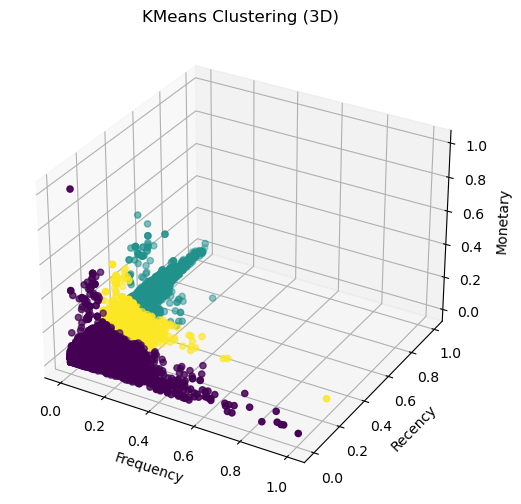

In [218]:
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# Normalizing the iris data using the MinMaxScaler.
X_normalized = MinMaxScaler().fit(rfm_data).transform(rfm_data)

# Initializing the KMeans clustering model with 3 clusters.
kmeans = KMeans(n_clusters = 3)
# Training the KMeans model on the normalized data.
kmeans.fit(X_normalized)

# Plotting the 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_normalized[:, 0], X_normalized[:, 1], X_normalized[:, 2], c=kmeans.labels_, cmap='viridis')

ax.set_title('KMeans Clustering (3D)')
ax.set_xlabel('Frequency')
ax.set_ylabel('Recency')
ax.set_zlabel('Monetary')

plt.show()

In [219]:
kmeans.cluster_centers_

array([[0.01323312, 0.12194242, 0.01687035],
       [0.00831696, 0.51759142, 0.01862579],
       [0.01093565, 0.31277034, 0.0157069 ]])

In [220]:
rfm_all = rfm_data.copy()

In [221]:
rfm_all['cluster'] = kmeans.labels_

In [222]:
rfm_all['CustomerID'] = rfm['CustomerID']

In [223]:
rfm_all = rfm_all[['CustomerID', 'Total_trips', 'Recency', 'Monetary', 'cluster']]

In [224]:
rfm_all

,CustomerID,Total_trips,Recency,Monetary,cluster
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,1,3544,174.0,0
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,1,3927,231.9,1
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,1,3996,294.9,1
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,2,3606,0.0,2
4,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,2,3852,486.8,1
...,...,...,...,...,...
1522329,5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F5345504837368.0M,1,3629,418.0,2
1522330,5A595749454344696420493F7C2067657420746869732072696768744A414D455337368.0M,2,3788,239.8,2
1522331,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M,2,3901,357.8,1
1522332,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C44938.0F,2,4075,297.6,1


In [225]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(rfm_data)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_normalized)
cluster_centers_original_scale = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers_original_scale, columns=rfm_data.columns)

In [226]:
cluster_centers_df

,Total_trips,Recency,Monetary
0,2.126346,3704.611472,276.006239
1,1.856632,3967.029084,327.301408
2,2.363146,3460.163622,296.439560


### Exploratory analysis by clusters
Further data analysis based on each segmentations to understand distinctive difference between groups 

In [227]:
rfm_all.groupby('cluster')[['Total_trips', 'Recency', 'Monetary']].mean()

,Total_trips,Recency,Monetary
cluster,,,
0,2.362159,3460.384169,296.206897
1,1.856095,3967.132734,327.297402
2,2.127134,3704.904848,276.228912


In [228]:
rfm_count = rfm_all.groupby('cluster').size().reset_index(name='count')
rfm_count

,cluster,count
0,0,535928
1,1,429625
2,2,556781


In [229]:
unique_df_new = unique_df[['CustomerID', 'Gender', 'Age', 'Ufly_membership_status', 'Card_holder?', '#Discounts', '#Upgrades',
                           'BkdClassOfService', 'TrvldClassOfService', 'Preferred_source-booking', 'BookingChannel',
                          'ServiceStartCity', 'ServiceEndCity']]

In [230]:
clustering_data = pd.merge(unique_df_new, rfm_all, on='CustomerID', how='inner')

In [231]:
clustering_data

,CustomerID,Gender,Age,Ufly_membership_status,Card_holder?,#Discounts,#Upgrades,BkdClassOfService,TrvldClassOfService,Preferred_source-booking,BookingChannel,ServiceStartCity,ServiceEndCity,Total_trips,Recency,Monetary,cluster
0,4120414C52484D414E44696420493F7C2067657420746869732072696768745A49414447687.0M,M,33.0,Not member,No,0,0.0,Coach,Coach,SCA Website Booking,SCA Website Booking,MSP,SAN,1,3544,174.0,0
1,414142454C44696420493F7C2067657420746869732072696768744B4556494E4A4F484E50666.0M,M,24.0,Not member,No,0,1.0,Coach,Discount First Class,Outside Booking,Outside Booking,JFK,MSP,1,3927,231.9,1
2,4141424552472042524F4F4B5344696420493F7C2067657420746869732072696768744E414E435939435.0F,F,54.0,Not member,No,0,0.0,Coach,Coach,Airport,LAS,LAS,MSP,1,3996,294.9,1
3,41414245524744696420493F7C206765742074686973207269676874414C4C414E204348524953544F5048455240549.0M,M,52.0,Not member,No,2,0.0,Coach,Coach,Tour Operator Portal,Tour Operator Portal,MSP,CZM,2,3606,0.0,2
4,41414245524744696420493F7C206765742074686973207269676874414E44524557204A4F4E415448414E48964.0M,M,29.0,Standard,No,0,2.0,Coach,Discount First Class,Outside Booking,Outside Booking,LAX,MSP,2,3852,486.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522329,5A595749454344696420493F7C2067657420746869732072696768744A414D4553204A4F5345504837368.0M,M,61.0,Not member,No,0,0.0,Coach,Coach,Outside Booking,Outside Booking,MSP,PHX,1,3629,418.0,2
1522330,5A595749454344696420493F7C2067657420746869732072696768744A414D455337368.0M,M,61.0,Not member,No,0,0.0,Coach,Coach,Outside Booking,Outside Booking,RSW,MSP,2,3788,239.8,2
1522331,5A595749454344696420493F7C2067657420746869732072696768744A4F53455048204A414D455347616.0M,M,32.0,Not member,No,0,0.0,Coach,Coach,SCA Website Booking,SCA Website Booking,MSP,BOS,2,3901,357.8,1
1522332,5A59574F544B4F44696420493F7C206765742074686973207269676874414D59204C44938.0F,F,39.0,Standard,No,0,0.0,Coach,Coach,Outside Booking,Outside Booking,MSP,RSW,2,4075,297.6,1


In [232]:
clustering_data.isnull().sum()

CustomerID                  0
Gender                      0
Age                         0
Ufly_membership_status      0
Card_holder?                0
#Discounts                  0
#Upgrades                   0
BkdClassOfService           0
TrvldClassOfService         0
Preferred_source-booking    0
BookingChannel              0
ServiceStartCity            0
ServiceEndCity              0
Total_trips                 0
Recency                     0
Monetary                    0
cluster                     0
dtype: int64

In [233]:
clustering_data.groupby(['cluster', 'Gender'])['Gender'].count()

cluster  Gender
0        F         277018
         M         258907
         U              3
1        F         226362
         M         203263
2        F         291564
         M         265201
         U             16
Name: Gender, dtype: int64

In [234]:
clustering_data.groupby(['cluster', 'Ufly_membership_status'])['Ufly_membership_status'].count()

cluster  Ufly_membership_status
0        Elite                        797
         Not member                423655
         Standard                  111476
1        Elite                        161
         Not member                367912
         Standard                   61552
2        Elite                        326
         Not member                464508
         Standard                   91947
Name: Ufly_membership_status, dtype: int64

In [235]:
pd.set_option('display.max_rows', None)
clustering_data.groupby(['cluster', '#Upgrades'])['#Upgrades'].count().to_frame(name='count').reset_index()

,cluster,#Upgrades,count
0,0,-6.0,1
1,0,-4.0,5
2,0,-3.0,7
3,0,-2.0,233
4,0,-1.0,344
5,0,0.0,498697
6,0,1.0,21061
7,0,2.0,10321
8,0,3.0,1971
9,0,4.0,1408


In [236]:
clustering_data.groupby(['cluster'])['#Upgrades'].mean()

cluster
0    0.127480
1    0.078517
2    0.100605
Name: #Upgrades, dtype: float64

In [237]:
clustering_data.groupby(['cluster', '#Discounts'])['#Discounts'].count().to_frame(name='count').reset_index()

,cluster,#Discounts,count
0,0,0,217999
1,0,1,80926
2,0,2,202681
3,0,3,9911
4,0,4,16819
5,0,5,2185
6,0,6,2525
7,0,7,734
8,0,8,694
9,0,9,286


In [238]:
clustering_data.groupby(['cluster'])['#Discounts'].mean()

cluster
0    1.195674
1    0.379014
2    0.534693
Name: #Discounts, dtype: float64

In [239]:
class_service_df = clustering_data.groupby(['cluster', 'BkdClassOfService', 'TrvldClassOfService'])['cluster'].count().reset_index(name='count')
class_service_df[class_service_df['count'] > 1000]

,cluster,BkdClassOfService,TrvldClassOfService,count
0,0,Coach,Coach,497925
1,0,Coach,Discount First Class,11373
2,0,Coach,First Class,11093
7,0,First Class,First Class,15042
8,1,Coach,Coach,402126
9,1,Coach,Discount First Class,8870
10,1,Coach,First Class,9048
15,1,First Class,First Class,9205
16,2,Coach,Coach,521380
17,2,Coach,Discount First Class,11618


In [240]:
booking_cluster = clustering_data.groupby(['cluster', 'BookingChannel'])['BookingChannel'].count().reset_index(name='count')
booking_cluster[booking_cluster['count'] >= 100]

,cluster,BookingChannel,count
1,0,DFW,114
2,0,FCM,637
7,0,LAX,113
10,0,MKE,107
11,0,MSP,874
12,0,Outside Booking,243338
16,0,Reservations Booking,20681
17,0,SCA Website Booking,234080
20,0,SY Vacation,8051
21,0,Tour Operator Portal,27384


In [241]:
pd.set_option('display.max_rows', None)
service_city_df = clustering_data.groupby(['cluster', 'ServiceStartCity', 'ServiceEndCity'])['cluster'].count().reset_index(name='count')
result = service_city_df[service_city_df['count'] >= 1000].sort_values(by=['cluster', 'count'], ascending=False)
result

,cluster,ServiceStartCity,ServiceEndCity,count
251,2,LAS,MSP,32463
277,2,MSP,LAS,31223
281,2,MSP,MCO,22866
260,2,MCO,MSP,22644
316,2,SFO,MSP,17230
252,2,LAX,MSP,17151
275,2,MSP,JFK,16967
244,2,JFK,MSP,16822
278,2,MSP,LAX,16566
290,2,MSP,RSW,16318


In [242]:
clustering_data.groupby(['cluster', 'Card_holder?'])['cluster'].count().reset_index(name='count')

,cluster,Card_holder?,count
0,0,No,530064
1,0,Yes,5864
2,1,No,428061
3,1,Yes,1564
4,2,No,553768
5,2,Yes,3013


In [243]:
pd.reset_option('display.max_rows')